In [1]:
#classifing cupcake and uffin with classification tecnique
#importing stuff

########### package for analysis
import pandas as pd
import numpy as np
from sklearn import svm

####packaages for data visualising

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

In [2]:
## importing the data from the csv file

recipes=pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


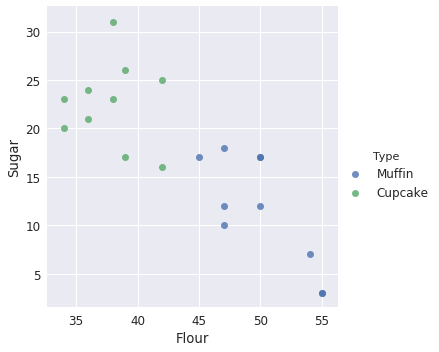

In [3]:
## plot different different ingridients
sns.lmplot('Flour','Sugar',data=recipes,fit_reg=False,hue=
          'Type')

  #### these are the sugar amd flour data in of the muffin and cupcake
  

#### we basically work with that ingridients


In [4]:
### for processing take all the ingridents value
ingridients=recipes[['Flour','Sugar']]

In [5]:
data=np.array(ingridients)
##convert to array to process the data


In [6]:
## this method is fine but hard to understand
##uncomment it if you want to use it

#type_label=np.where(recipes['Type']=='Muffin',0,1)
#type_label

In [7]:
label=[]
for x in recipes['Type']:
    if x=='Muffin':
        label.append(0)
    else:
        label.append(1)
label_data=np.array(label)

In [8]:
label_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
#### lets see the feture that is used for the use of muffin and cupcake
recipe_feture_raw=list(recipes.columns.values)

In [10]:
recipe_fetures=recipe_feture_raw[1:]

In [11]:
recipe_fetures

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [12]:
model=svm.SVC(kernel='linear')
model.fit(ingridients,label_data)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
model.predict([[23,23]])
## that means we clearly we predict the data 
## but we can also visulzie the hyperplane

array([1])

In [14]:
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [15]:
muffin_or_cupcake(5,9)

You're looking at a cupcake recipe!


In [16]:
###collected from other program
## any separeting plane in SVC can draw from this program
## just change the classifier name 


## get the separeting hyper plane
###########################################
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]
###########################################

##plot the parallels line or the tunnel the hyperplane 
##passed through it
###########################################
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
#####################################






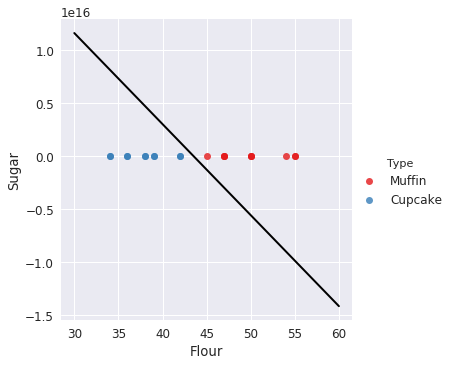

In [17]:
## plot the hyper plane with the data
sns.lmplot('Flour','Sugar',data=recipes,hue='Type',fit_reg=False,palette='Set1')
plt.plot(xx, yy, linewidth=2, color='black');

In [18]:
## how about full feature

In [19]:
ingridients1=recipes[['Flour','Milk','Sugar','Butter','Egg','Baking Powder','Vanilla','Salt']]

In [20]:
ingridients1

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,55,28,3,7,5,2,0,0
1,47,24,12,6,9,1,0,0
2,47,23,18,6,4,1,0,0
3,45,11,17,17,8,1,0,0
4,50,25,12,6,5,2,1,0
5,55,27,3,7,5,2,1,0
6,54,27,7,5,5,2,0,0
7,47,26,10,10,4,1,0,0
8,50,17,17,8,6,1,0,0
9,50,17,17,11,4,1,0,0


In [21]:
data1=np.array(ingridients1)

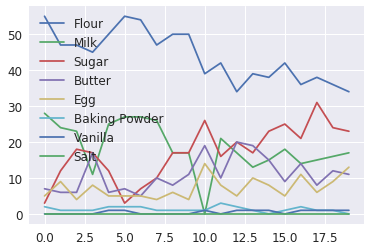

In [22]:
ingridients1.plot()

In [23]:
model1=svm.SVC(kernel='linear')
model1.fit(ingridients1,label_data)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
model1.predict([[50,17,17,8 ,6 ,1 ,0 ,0]])

array([0])

In [25]:
def muffin_or_cupcake(flour,Milk,Sugar,Butter,Egg,Baking_powder,Vanila,Salt):
    if(model1.predict([[flour,Milk,Sugar,Butter,Egg,Baking_powder,Vanila,Salt]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [26]:
muffin_or_cupcake(50,17,17,8 ,6 ,1 ,0 ,0)

You're looking at a muffin recipe!
